In [217]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import matplotlib.ticker as ticker
import plotly.express as px

In [218]:
# Import data, change column header from Sex to Gender
df = pd.read_csv('../Resources/Cleaning2/merged_events_bio.csv')
df = df.rename(columns={'Sex': 'Gender'})
df.head(5)

,Athlete_ID,Name,Age,Gender,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [219]:
# Define dropdown menus, alphabetize sports and countries
gender_dropdown = widgets.Dropdown(
    options=['Both', 'M', 'F'],
    value='Both',
    description='Gender:')

sports = ["ALL"] + sorted(df['Sport'].unique().tolist())
sports.sort()
sport_dropdown = widgets.Dropdown(options=sports, value="ALL", description="Sport:")

countries = ["ALL"] + sorted(df['Country_Name'].unique().tolist())
countries.sort()
country_dropdown = widgets.Dropdown(options=countries, value="ALL", description='Country:')

In [220]:
# Define the callback functions
def on_gender_change(change):
    update_plot(filtered_df, change.new, sport_dropdown.value, country_dropdown.value)
    
def on_sport_change(change):
    update_plot(filtered_df, gender_dropdown.value, change.new, country_dropdown.value)
    
def on_country_change(change):
    update_plot(filtered_df, gender_dropdown.value, sport_dropdown.value, change.new)

In [221]:
# Define the function to filter the data 
def filter_data(df, gender, country=None, sport=None):
    filtered_df = df.copy()
    if gender != 'Both':
        filtered_df = filtered_df[filtered_df['Gender'] == gender]
    if country != 'ALL':
        filtered_df = filtered_df[filtered_df['Country_Name'] == country]
    if sport != 'ALL':
        filtered_df = filtered_df[filtered_df['Sport'] == sport]
    
    # filter out rows where no medal was received
    filtered_df = filtered_df[~(filtered_df['Medal'] == 'na')]
        
    return filtered_df

In [222]:
# Define the function to update the medal bar chart
def update_plot(gender, sport, country):
    filtered_df = filter_data(df, gender, country, sport)
    filtered_df = filtered_df[filtered_df['Age'].notnull()] # Filter out rows where Age is null
    filtered_df['Age'] = filtered_df['Age'].astype(int) # Convert Age column to integer
    medal_counts = pd.pivot_table(filtered_df, index=['Age'], columns=['Medal'], values='Name', aggfunc='count', fill_value=0)

    # Add a new column to medal_counts with the total count for each age
    medal_counts['Total'] = medal_counts['Gold'] + medal_counts['Silver'] + medal_counts['Bronze']

    age_order = sorted(filtered_df['Age'].unique())
    fig = px.bar(medal_counts, x=medal_counts.index, y=['Gold', 'Silver', 'Bronze'], barmode='stack',
                 color_discrete_map={'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'brown'},
                 labels={'value': 'Medal Count', 'variable': 'Medal'},
                 category_orders={'x': age_order},
                 hover_data={'Total': True}) # Add the total count to the hover label

    fig.update_layout(title='Medal Count by Age', xaxis_title='Age', yaxis_title='Medal Count', legend_title='Medal')
    fig.show()

In [223]:
# Define the function to reset the dropdown menus
def reset_dropdowns():
    gender_dropdown.value = 'Both'
    sport_dropdown.value = 'ALL'
    country_dropdown.value = 'ALL'

In [224]:
# Register the callback functions
gender_dropdown.observe(on_gender_change, names='value')
sport_dropdown.observe(on_sport_change, names='value')
country_dropdown.observe(on_country_change, names='value')

In [227]:
# Display the dropdown menus
display(gender_dropdown)
display(sport_dropdown)
display(country_dropdown)

Dropdown(description='Gender:', index=2, options=('Both', 'M', 'F'), value='F')

Dropdown(description='Sport:', index=19, options=('3x3 Basketball', 'ALL', 'Aeronautics', 'Alpine Skiing', 'Al…

Dropdown(description='Country:', index=697, options=(' Afghanistan', ' Albania', ' Albania  Australia', ' Alba…

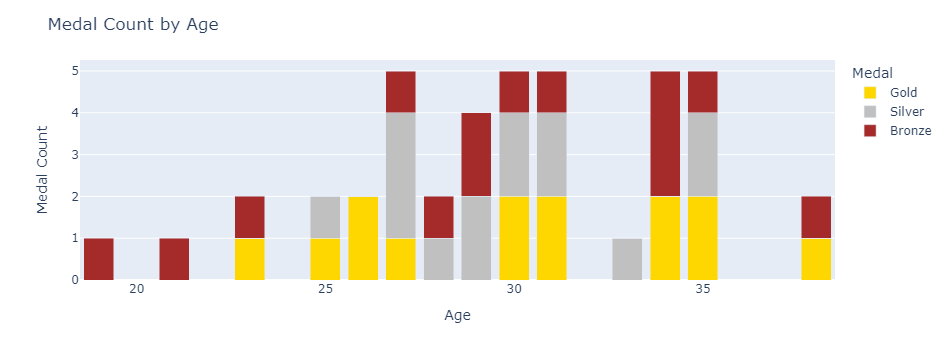

In [228]:
# Display the bar chart
#filtered_df = df.copy()
update_plot(gender_dropdown.value, sport_dropdown.value, country_dropdown.value)